# Übung 4 | Planeten- und Satellitenbahnen (bepohl@ethz.ch)

Die Aufgaben zu Planeten und Satellitenbahnen wurden hier in dem Jupyter Notebook durchgeführt. Die Gleichungen wurden zuerst von Hand umgeformt oder aus den Vorlesungsunterlagen entnommen.

In [25]:
import numpy as np
from tqdm import tqdm
import datetime

## Aufgabe 1

Hier berechnen wir die Masse des Erde-Mond-Systems anhand von gegebener Halbachse (H_moon) und Umlaufzeit (T_moon) des Mondes: $$ M_{ges} = \left (\frac{2 \cdot \pi}{T_{moon}}\right )^2 \cdot \frac{H_{moon}^3}{G}$$

Die Erde hat eine Masse von ca. $6.0 × 10^{24}$ kg, während der Mond ca. $7.3 × 10^{22}$ kg (also 1/81 Masse der Erde) hat [Quelle: NASA, https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html]. 
Die Grössenordnung der Berechnung unten stimmt also. Es gibt aber eine Abweichung, da wir nur mit einer Halbachse und der Umlaufzeit grob approximieren.

In [26]:
T_moon = 27 * 86400 # seconds
H_moon = 400000 * 10**3 # meters
G = 6.673 * 10**(-11) # m^3/(kg*s^2)

M_ges = ((2*np.pi / T_moon)**2) * (H_moon**3 / G)

print("Masse von Erde-Mond-System:", "{:.3e}".format(M_ges), "kg")

Masse von Erde-Mond-System: 6.958e+24 kg


## Aufgabe 2

Zuerst müssen wir die grosse Halbachse berechnen: $$a = \sqrt[3]{\frac{T_s^2 \cdot GM}{4 \cdot \pi^2}}$$
Mit a können wir weiter die kleine Halbachse berechnen: $$b = \frac{c_s \cdot T_s}{a \cdot \pi}$$

Die Bahn des Satelliten ist deutlich abgeflacht. Dies sieht man am Verhältnis von $\frac{a}{b} = 3.197$. Je näher dies an 1 ist, desto "runder" ist die Ellipse. Mit diesen Ergebnissen (Grosse Halbachse: 9156.655 km, kleine Halbachse: 2863.978 km) kann im nächsten Teil weitergerechnet werden.

In [27]:
T_s = 8720 # seconds
c_s = 9.448 * 10**9 # m^2/s
GM = 3.986 * 10**14 # m^3/s^2

a = (T_s**2 * GM / (4 * np.pi**2))**(1/3)
b = c_s * T_s / (a * np.pi)

print("Grosse Halbachse:", round(a / 10**3, 3), "km, kleine Halbachse:", round(b / 10**3, 3), "km")

Grosse Halbachse: 9156.655 km, kleine Halbachse: 2863.978 km


Für die wahre Anomalie muss zuerst mit Iteration die exzentrischen Anomalie berechnet werden. Ich habe hier eine Approximation mit 10 Iterationen durchgeführt, um den Code schnell laufen lassen zu können. Mit der exzentrischen Anomalie kann man die wahre Anomalie bestimmen (siehe Formel in Foliensatz, Seite 7). Die Position kann in Bahnebne einfach bestimmt werden. Für die Geschwindigkeit habe ich auf die Formel im Skript zurückgegriffen (einzelne Komponenten quadriert und addiert): $$v = \sqrt{ \left (-\sqrt{\frac{GM}{p}} \cdot \sin{v} \right)^2 + \left (\sqrt{\frac{GM}{p}} \cdot (e + \cos{v}\right )^2 }$$

Die wahre Anomalie ist sehr gross (2.57 rad). Dies erstaunt aber weniger, da wir gesehen haben, dass die Bahn sehr abgeflacht ist. In der Nähe der Erde (Perigäum) muss also der Satellit sehr schnell sein. Damit hat er auch eine sehr hohe Winkelgeschwindigkeit (und auch seine eigene Geschwindigkeit ist hoch). Ganz zum Schluss habe ich diese Geschwindigkeit geplottet (mit Minima/Maxima der Geschwindigkeit). Dort erkennt man den Verlauf der Umlaufgeschwindigkeit sehr gut.


In [28]:
t_1 = 2 * 3600 + 30 * 60
t_0 = 2 * 3600 + 20 * 60

M_t1 = 2 * np.pi / T_s * (t_1 - t_0)
e = (1 - b**2 / a**2)**(1/2)

E = M_t1
for n in tqdm(range(10)):
    E = M_t1 + e * np.sin(E)

v = 2 * np.arctan(np.tan(E / 2) * np.sqrt((1 + e) / (1 - e)))

100%|██████████| 10/10 [00:00<00:00, 100824.62it/s]


In [29]:
p = a * (1 - e**2)

r = p / (1 + e * np.cos(v))

x = r * np.cos(v)
y = r * np.sin(v)

V_s = np.sqrt( (-np.sqrt(GM / p) * np.sin(v))**2 + (np.sqrt(GM / p) * (e + np.cos(v)))**2 )

print("X:", x, "m, Y:", y, "m, Velocity:", round(V_s, 3), "m/s")

X: -6793939.802508924 m, Y: 2801424.757128903 m, Velocity: 8059.055 m/s


41130.4544377942 1058.8749438791922


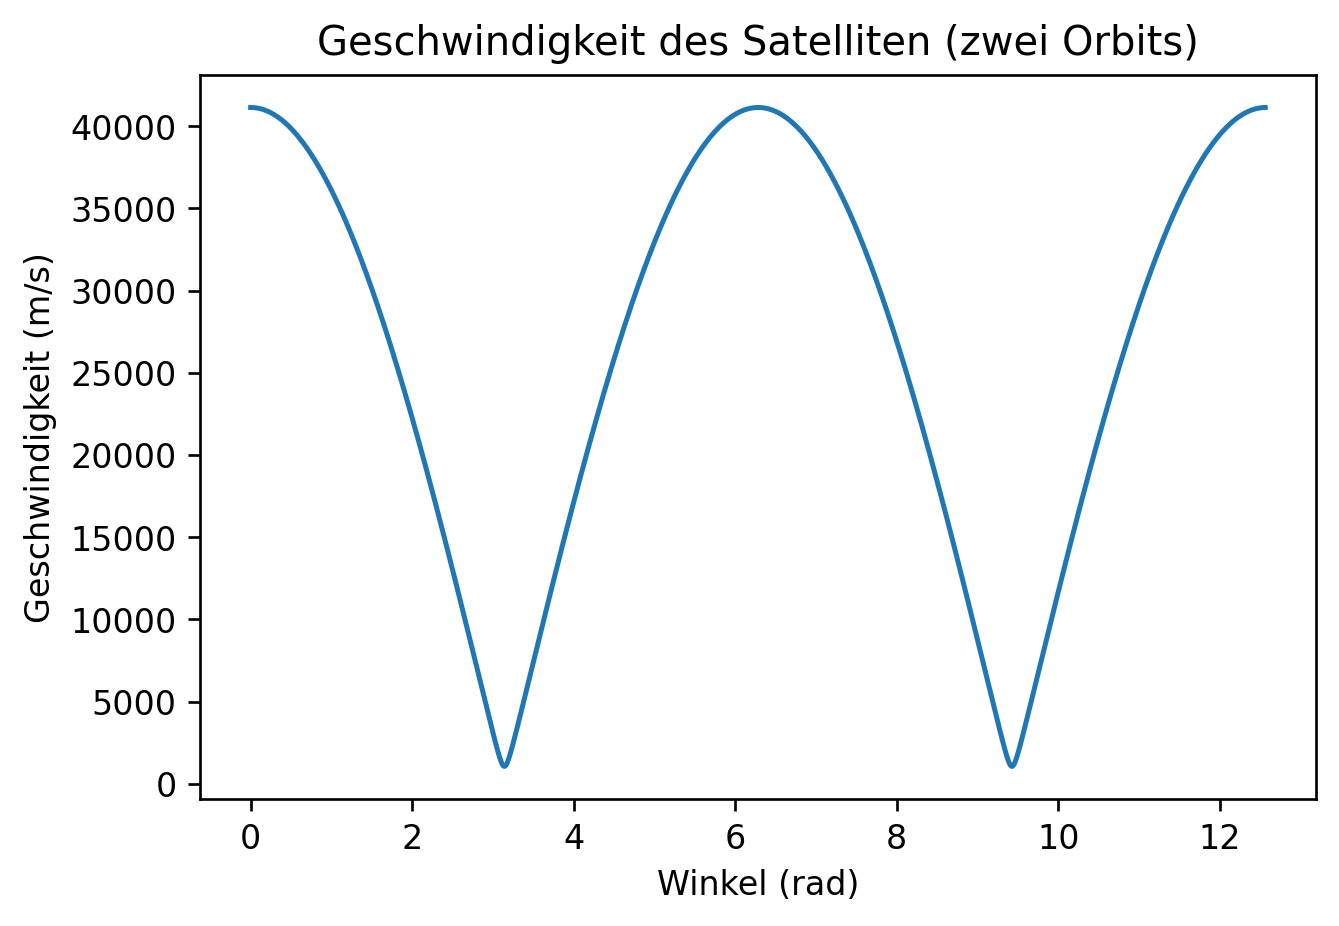

In [30]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 240

x = np.arange(0,4*np.pi, 0.01)
y = np.sqrt( (-np.sqrt(GM / p) * np.sin(x))**2 + (np.sqrt(GM / p) * (e + np.cos(x)))**2 )
v_max, v_min = max(y), min(y)
print(v_max, v_min)

plt.title("Geschwindigkeit des Satelliten (zwei Orbits)")
plt.ylabel("Geschwindigkeit (m/s)")
plt.xlabel("Winkel (rad)")
plt.plot(x,y)
plt.show()

## Aufgabe 

Hier ist das schon oben diskutierte Verhältnis der Halbachsen in der Nähe von eins (0.95). Somit ist dieser Satellit mit etwa konstanter Geschwindigkeit auf einer fast kreisförmigen Bahn unterwegs. Um das Apo- und Perigäum in der Zukunft zu finden, musste man das letzte Perigäum finden. Danach konnte man einfach entweder eine ganze (wieder Perigäum) oder eine halbe (Apogäum) Periode addieren, um die Zeitpunkte zu bestimmen. 

In [31]:
e_3 = 0.3
v_3 = 51 * np.pi / 180 + 30 * (np.pi / (60 * 180)) + 36 * np.pi / (3600 * 180)
t_3 = 16 * 3600 + 45 * 60 + 50
T_3 = 2 * 3600 + 30 * 60 + 20


E_t3 = 2 * np.arctan( np.tan(v_3 / 2) * np.sqrt( (1 - e_3) / (1 + e_3)) )
M_t3 = E_t3 - e_3 * np.sin(E_t3)

t_3_peri_0 = t_3 - T_3 * M_t3 / (2 * np.pi)

t_3_apo = t_3_peri_0 + T_3 / 2 # half a period after peri is apo
t_3_peri = t_3_peri_0 + T_3 # whole period after peri is next peri

print("Perigee Past:", str(datetime.timedelta(seconds=t_3_peri_0)))
print("Apogee Future:", str(datetime.timedelta(seconds=t_3_apo)))
print("Perigee Future:", str(datetime.timedelta(seconds=t_3_peri)))

Perigee Past: 16:34:04.054246
Apogee Future: 17:49:14.054246
Perigee Future: 19:04:24.054246


## Aufgabe 4

Da der Satellit eine sehr kleine Masse im Vergleich zur Erde hat, können wir diese vernachlässigen. Mit Hilfe der Kepler Konstante kann die Halbachse berechnet werden (siehe Code). Die Höhe wird bezüglich der Erdoberfläche angegeben, weswegen der Erdradius davon abgezogen werden muss. 

Die Höhe entspricht in etwa einem geosynchronen Satelliten mit einer Kreisbahn (um 35'800 km). Ein spezieller Fall dieser Umlaufbahn sind geostationäre. Diese Orbits werden für verschiedene Kommunikations-, TV- oder Erdbeobachtungs-/Wettersatelliten verwendet. Wir können aber hier keinen Schluss daraus ziehen, ob dieser Satellit eine Bahnneigung hat. Ist dies der Fall, bewegt sich der Satellit bezüglich der Erdoberfläche (bzw. die Position im Himmel in erdfesten Koordinaten / von Beobachtern aus).

In [32]:
OMEGA = 7.29 * 10**-5 # rad / s
R_e = 6378 * 10**3 # m

H_sat = ((GM / OMEGA**2))**(1/3) - R_e
print("Höhe des Satelliten:", round((H_sat / 10**3), 2), "km")

Höhe des Satelliten: 35794.31 km
